SPECIFIC OBJECTIVES OF ANALYSIS 
1. To examine the distrib ution of airbnb listings across different neighbourhood and boroughs in new york
2. to analyze the pricing structure of airbnb listings and identify the factors influencing listing prices
3. to investigate the relationship between availability (number of days per year and price,room type and neighborhood
4. to assess host activity levels by evaluatingt number of listings per host and total reviews
5. to identify and visualise spatial patterns of airbnb density and pricing using geolocation data (latitude and longitude)
6. to explore customer engagement through review frequency and evaluate its relationship with pricing or availability

In [2]:
import pandas as pd 
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv('airbnb.csv')
df

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

The dataset contains ;
1. three columns with float 
2. 7 columns with integers 
3. 6 columns with object

In [5]:
df.head(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [6]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


1.the average price for listed airbnbs is 152.7, the highest amount is 10000 while the lowest is 0.0000
2.the highest number of reviews is 629 while the lowest is 0.0000
3. the highest review per month is 58,.5 while the lowest is 0.00
4.the average availability rate is 112.78 while most listings are usually available throughout the years 

In [7]:
duplicate_rows= df[df.duplicated()]
duplicate_rows

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365


In [8]:
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [9]:
df.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [10]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [11]:
df= df.dropna(subset=['host_name'])
df.loc[:, 'reviews_per_month']=df['reviews_per_month'].fillna(0)
df.loc[:, 'last_review']=df['last_review'].fillna('Not Reviewed')
df

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,Not Reviewed,0.00,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,Not Reviewed,0.00,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,Not Reviewed,0.00,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,Not Reviewed,0.00,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,Not Reviewed,0.00,6,2


## objective 1 : To examine the distrib ution of airbnb listings across different neighbourhood and boroughs in new york

In [12]:
sns.set(style='whitegrid')
plt.figure(figsize=(10,6))

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

In [13]:
borough_counts= df['neighbourhood_group'].value_counts()
borough_counts

neighbourhood_group
Manhattan        21652
Brooklyn         20095
Queens            5664
Bronx             1090
Staten Island      373
Name: count, dtype: int64

C:\Users\RSD\AppData\Local\Temp\ipykernel_3520\1545598632.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=borough_counts.index, y=borough_counts.values,palette='Set2')


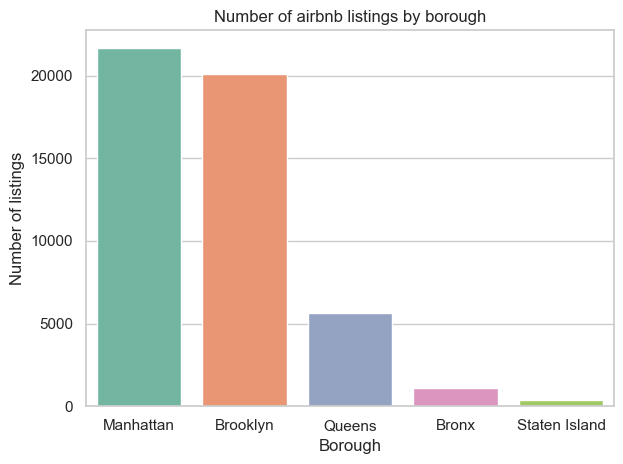

In [14]:
sns.barplot(x=borough_counts.index, y=borough_counts.values,palette='Set2')
plt.title('Number of airbnb listings by borough')
plt.xlabel('Borough')
plt.ylabel('Number of listings')
plt.tight_layout()
plt.show()

In [15]:
top10_neighborhoods=df['neighbourhood'].value_counts().head(10)

C:\Users\RSD\AppData\Local\Temp\ipykernel_3520\3269588758.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top10_neighborhoods.values,y=top10_neighborhoods.index, palette='muted')


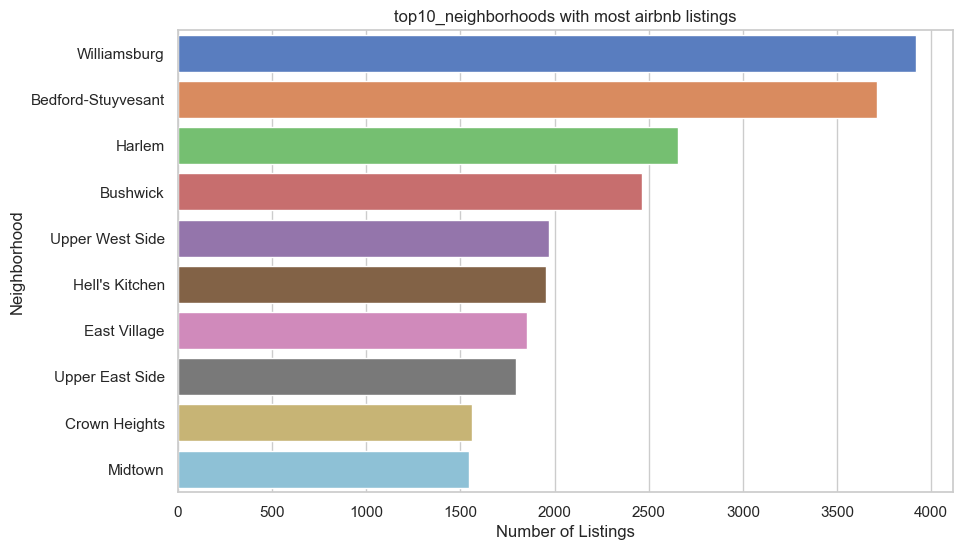

In [16]:
plt.figure(figsize=(10,6))
sns.barplot(x=top10_neighborhoods.values,y=top10_neighborhoods.index, palette='muted')
plt.title('top10_neighborhoods with most airbnb listings')
plt.xlabel('Number of Listings')
plt.ylabel('Neighborhood')
plt.show ()

williamsburg and  bedford-stuyvesant have the highest listings which is about 4000
followed by harlem and bushwick which have up to 2500 listings 

## objective 2 to analyze the pricing structure of airbnb listings and identify the factors influencing listing prices

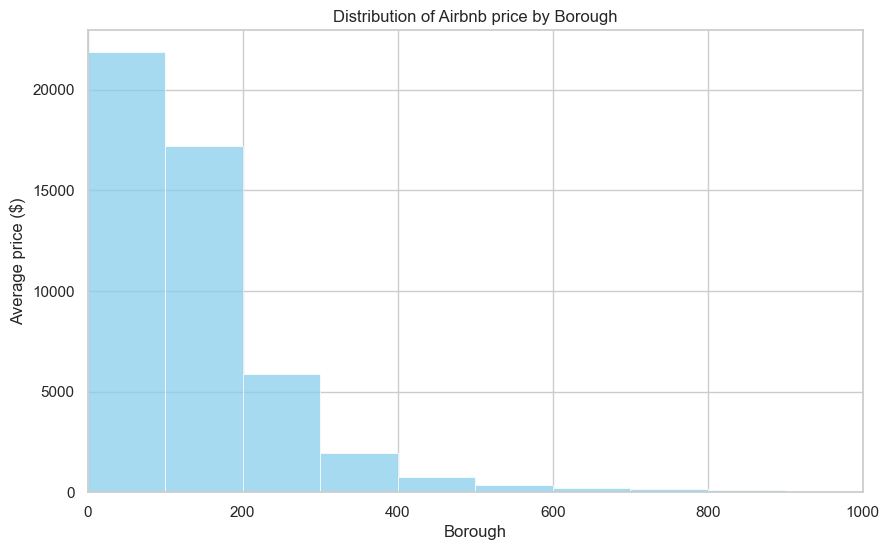

In [17]:
plt.figure(figsize=(10,6))
sns.histplot(df['price'], bins=100,kde =False, color='skyblue')
plt.xlim(0,1000)
plt.title('Distribution of Airbnb price by Borough')
plt.xlabel('Borough')
plt.ylabel('Average price ($)')
plt.show()

C:\Users\RSD\AppData\Local\Temp\ipykernel_3520\2738261596.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_price_borough.index, y=avg_price_borough.values,palette='Set1')


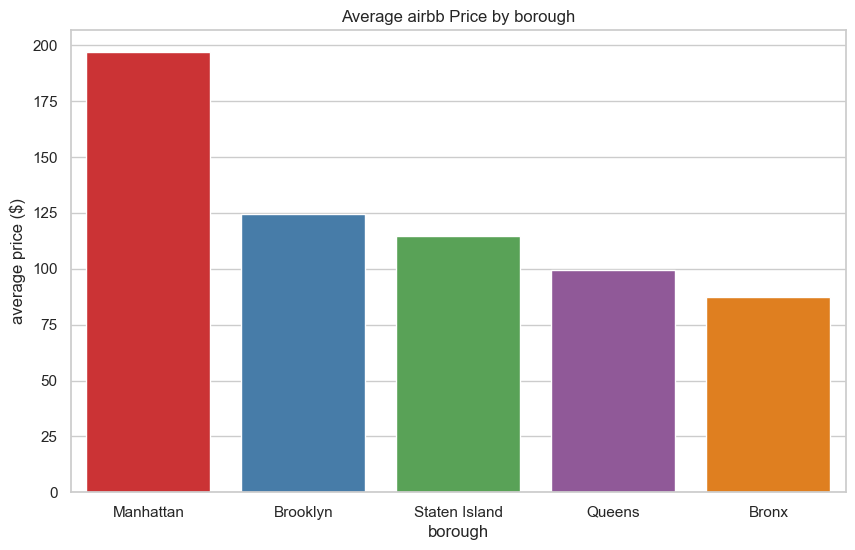

In [18]:
plt.figure(figsize=(10,6))
avg_price_borough =df.groupby('neighbourhood_group')['price'].mean().sort_values(ascending=False)
sns.barplot(x=avg_price_borough.index, y=avg_price_borough.values,palette='Set1')
plt.title('Average airbb Price by borough')
plt.xlabel("borough")
plt.ylabel('average price ($)')
plt.show()

- manhattan has the highest average airbnb price whic is up to about 200
- bronx has the lowest average price of about 85 

C:\Users\RSD\AppData\Local\Temp\ipykernel_3520\2469094113.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_price_room.index, y=avg_price_room.values,palette='Set3')


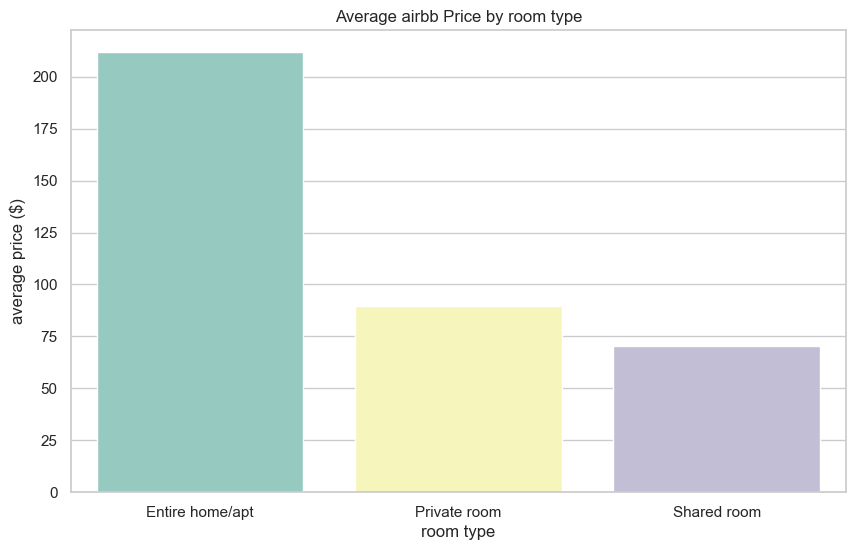

In [19]:
plt.figure(figsize=(10,6))
avg_price_room =df.groupby('room_type')['price'].mean().sort_values(ascending=False)
sns.barplot(x=avg_price_room.index, y=avg_price_room.values,palette='Set3')
plt.title('Average airbb Price by room type')
plt.xlabel("room type")
plt.ylabel('average price ($)')
plt.show()

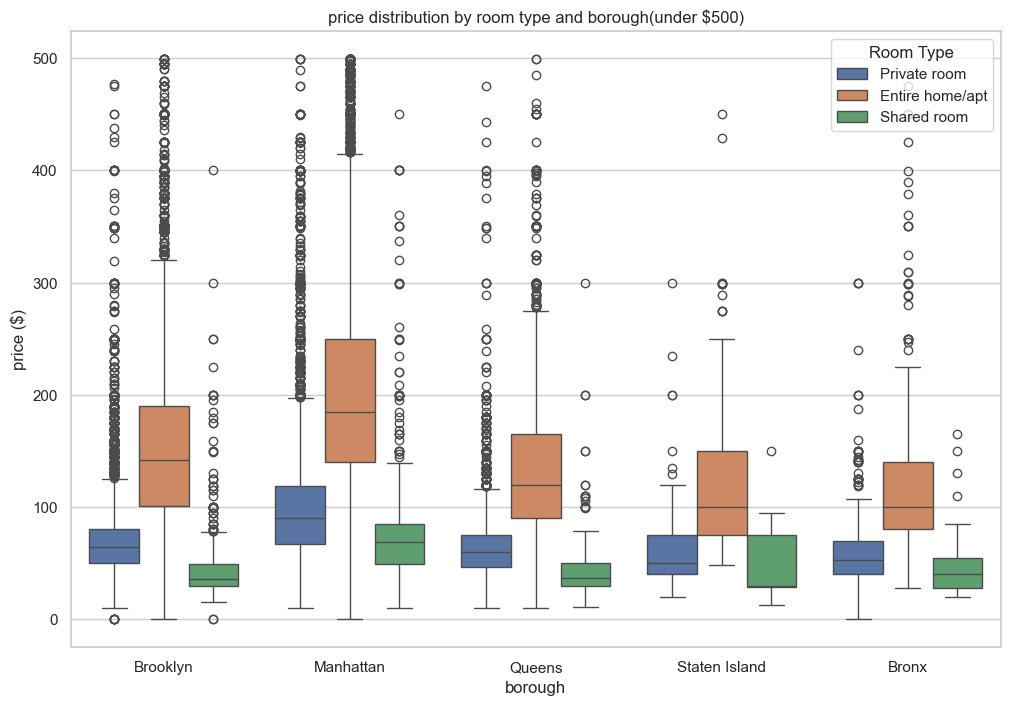

In [20]:
plt.figure(figsize=(12,8))
sns.boxplot(data=df[df['price']<500], x ='neighbourhood_group', y='price', hue='room_type')
plt.title('price distribution by room type and borough(under $500)')
plt.xlabel("borough")
plt.ylabel('price ($)')
plt.legend(title='Room Type')
plt.show()

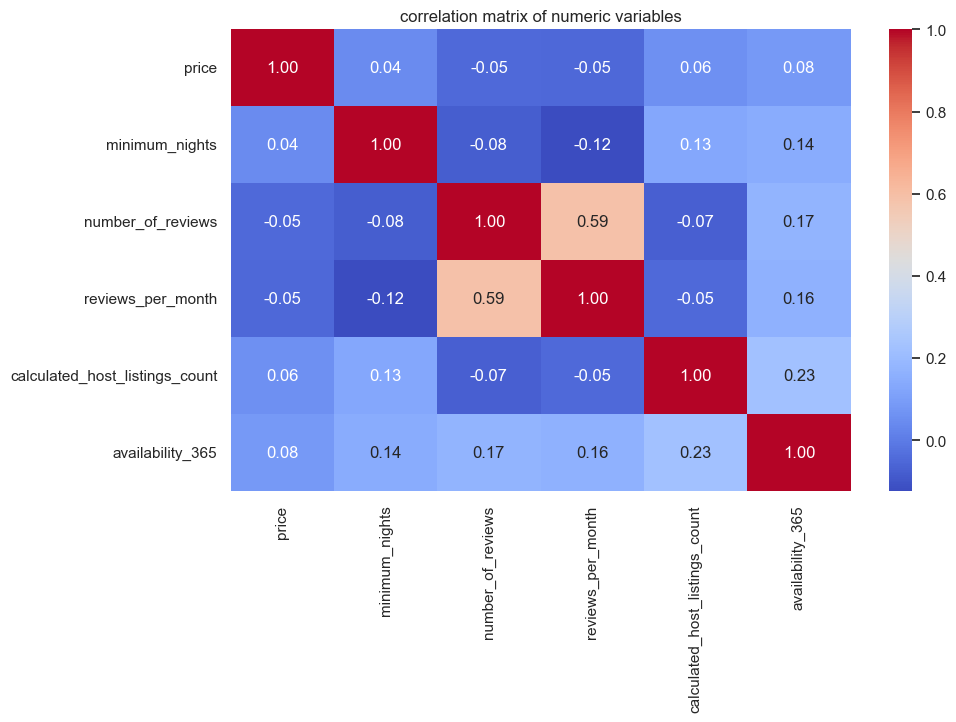

In [21]:
numeric_df =df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']]
plt.figure(figsize=(10,6))
sns.heatmap(numeric_df.corr(), annot=True,cmap='coolwarm',fmt='.2f')
plt.title('correlation matrix of numeric variables')
plt.show()

In [22]:
df.sample()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
6006,4396142,Entirely private suite in our townhouse!,1167801,Pascal & Karin,Queens,Long Island City,40.75227,-73.95012,Entire home/apt,160,4,79,2019-06-30,1.38,1,133


### objective 3:to investigate the relationship between availability (number of days per year and price,room type and neighborhood

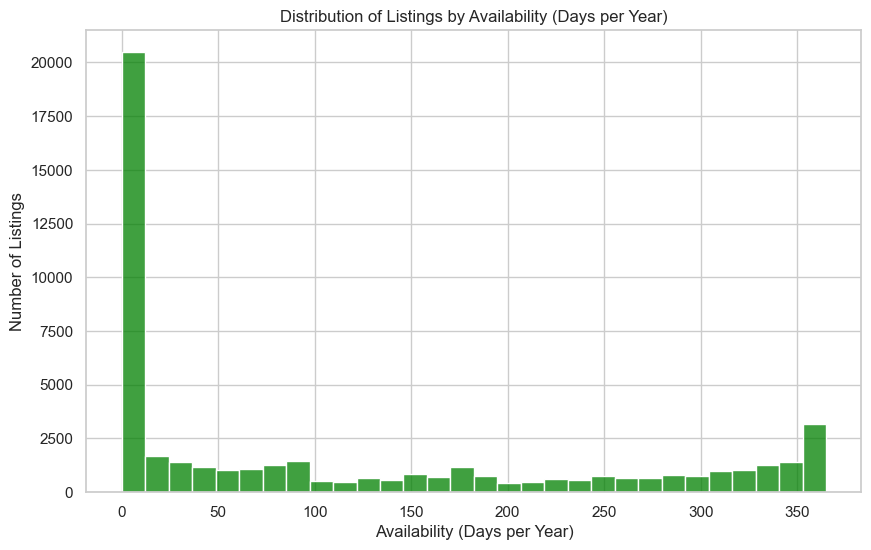

C:\Users\RSD\AppData\Local\Temp\ipykernel_3520\3716243303.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=room_availability.index, y=room_availability.values, palette='Pastel1')


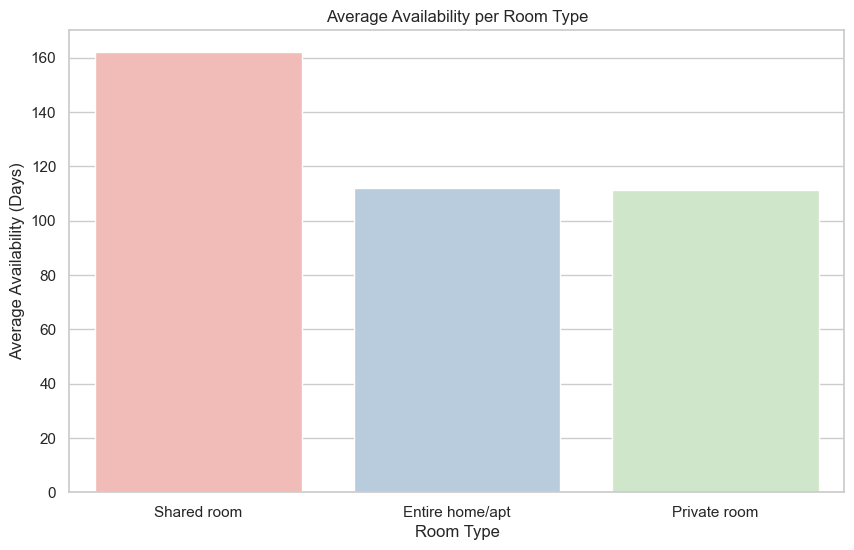

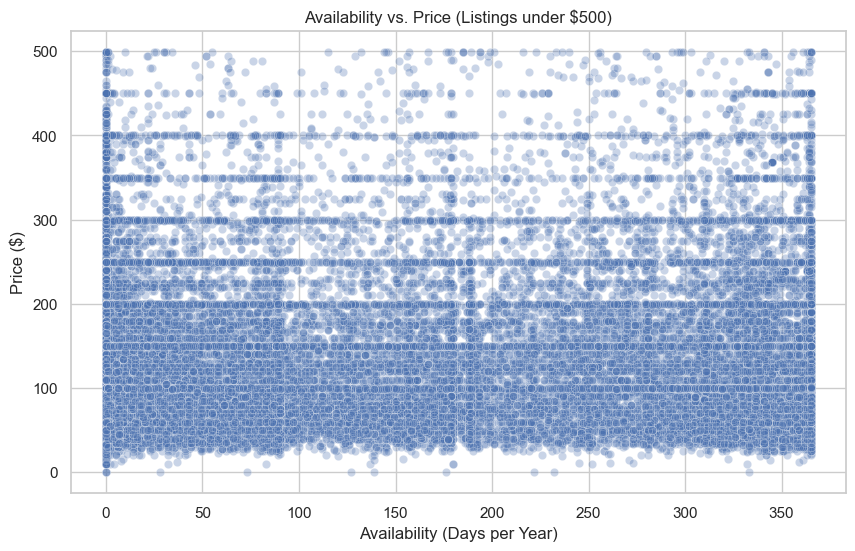

C:\Users\RSD\AppData\Local\Temp\ipykernel_3520\3716243303.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='neighbourhood_group', y='availability_365', palette='Set2')


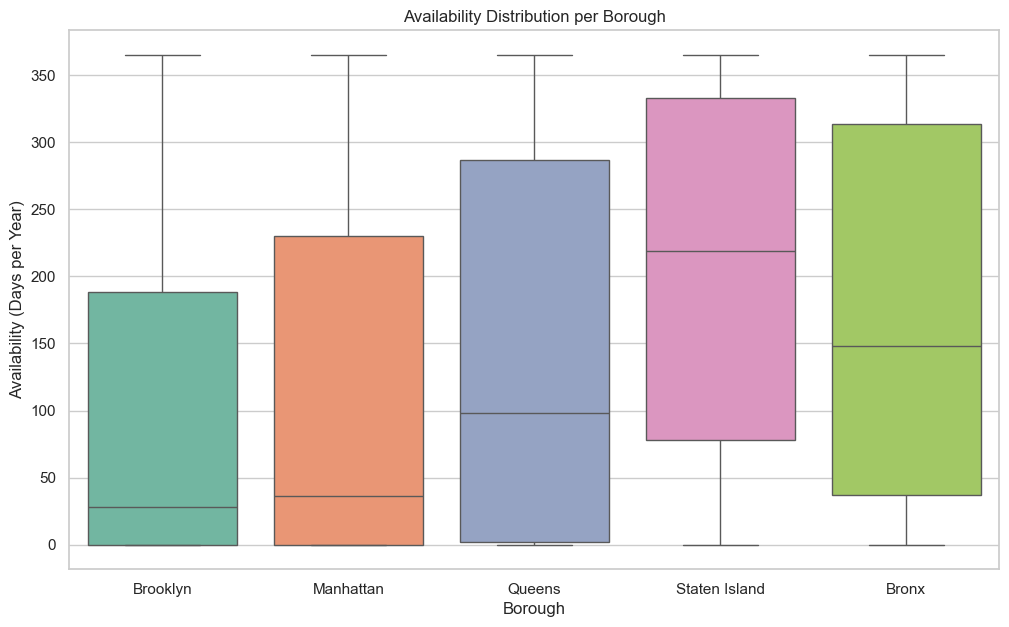


Listings Count by Room Type and Availability Range:
availability_365  0-50  51-150  151-300  301-365
room_type                                       
Entire home/apt   4234    3418     5035     3841
Private room      3016    3547     3542     3857
Shared room        144     187      127      406


In [23]:
# 1. Distribution of availability
plt.figure(figsize=(10, 6))
sns.histplot(df['availability_365'], bins=30, color='green')
plt.title('Distribution of Listings by Availability (Days per Year)')
plt.xlabel('Availability (Days per Year)')
plt.ylabel('Number of Listings')

plt.show()

# 2. Average availability by room type
plt.figure(figsize=(10, 6))
room_availability = df.groupby('room_type')['availability_365'].mean().sort_values(ascending=False)
sns.barplot(x=room_availability.index, y=room_availability.values, palette='Pastel1')
plt.title('Average Availability per Room Type')
plt.xlabel('Room Type')
plt.ylabel('Average Availability (Days)')

plt.show()

# 3. Availability vs. price: Scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df[df['price'] < 500], x='availability_365', y='price', alpha=0.3)
plt.title('Availability vs. Price (Listings under $500)')
plt.xlabel('Availability (Days per Year)')
plt.ylabel('Price ($)')

plt.show()

# 4. Boxplot: Availability per borough
plt.figure(figsize=(12, 7))
sns.boxplot(data=df, x='neighbourhood_group', y='availability_365', palette='Set2')
plt.title('Availability Distribution per Borough')
plt.xlabel('Borough')
plt.ylabel('Availability (Days per Year)')

plt.show()

# 5. Cross-tabulation: Count of listings by room type and availability ranges
availability_bins = pd.cut(df['availability_365'], bins=[0, 50, 150, 300, 365], labels=['0-50', '51-150', '151-300', '301-365'])
crosstab = pd.crosstab(df['room_type'], availability_bins)
print("\nListings Count by Room Type and Availability Range:")
print(crosstab)

In [28]:
df.sample(7)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
12848,9794251,400 sq foot studio east village,50475515,Gilad,Manhattan,East Village,40.72407,-73.98236,Entire home/apt,140,12,0,Not Reviewed,0.00,1,0
756,271954,Beautiful brownstone apartment,1423798,Aj,Manhattan,Greenwich Village,40.73388,-73.99452,Entire home/apt,150,2,203,2019-06-20,2.22,1,300
32357,25323294,Entire apartment with amazing views!,40078170,Sandy,Manhattan,Financial District,40.71033,-74.00743,Entire home/apt,245,2,8,2018-12-09,0.68,1,163
25107,20119649,CROWN HEIGHTS GUESTS HOUSE 3L,74541079,Abraham,Brooklyn,Crown Heights,40.67081,-73.93646,Entire home/apt,129,3,24,2019-07-01,1.04,9,74
26548,21123576,Bedstuy treasure,46019665,Jose,Brooklyn,Bedford-Stuyvesant,40.68444,-73.95156,Private room,55,3,1,2017-10-17,0.05,1,0
4458,3056451,One Bedroom close to everything!,15559190,Kerry,Manhattan,West Village,40.72916,-74.00433,Entire home/apt,120,3,5,2016-10-28,0.08,1,0
4428,3013383,Unique Brooklyn Brownstone,15356877,Rachel,Brooklyn,Cobble Hill,40.68494,-73.99685,Entire home/apt,795,6,0,Not Reviewed,0.00,1,14


objective 4:to assess host activity levels by evaluating number of listings per host and total reviews

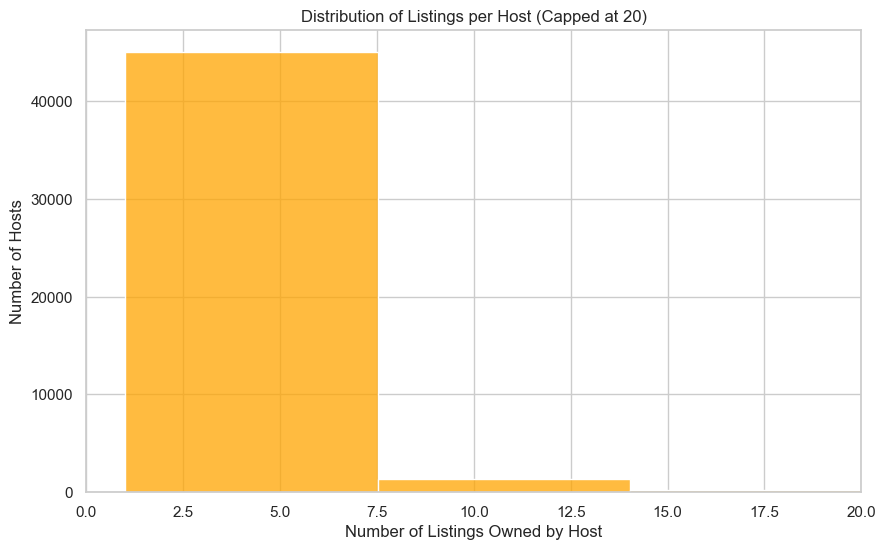

C:\Users\RSD\AppData\Local\Temp\ipykernel_3520\2655324489.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_hosts.values, y=top_hosts.index, palette='coolwarm')


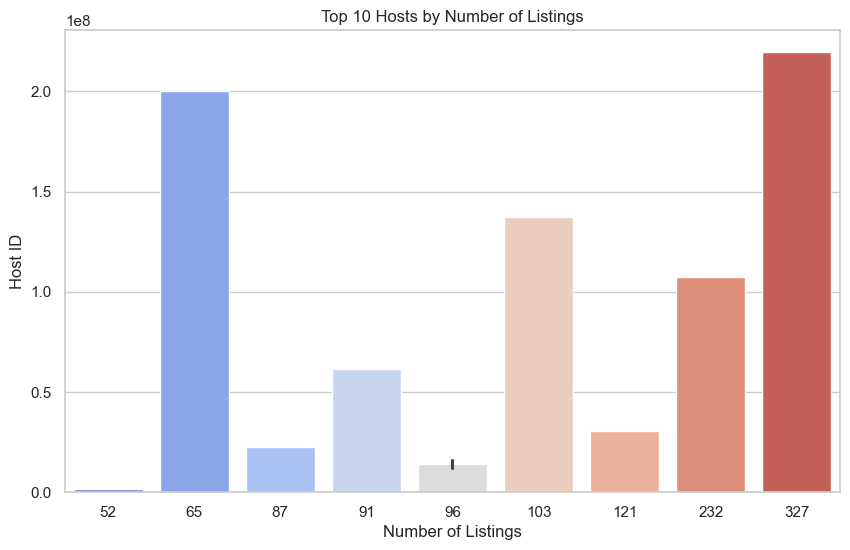

C:\Users\RSD\AppData\Local\Temp\ipykernel_3520\2655324489.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=reviews_per_host.values, y=reviews_per_host.index, palette='mako')


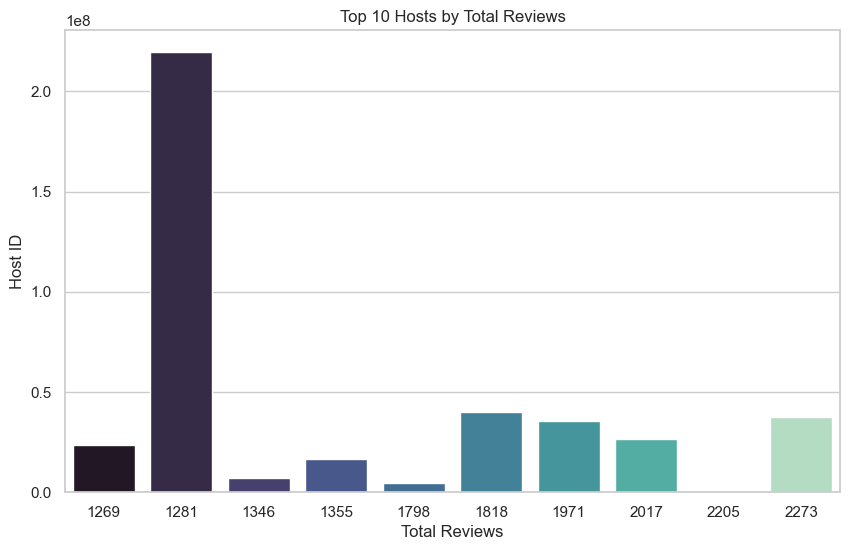

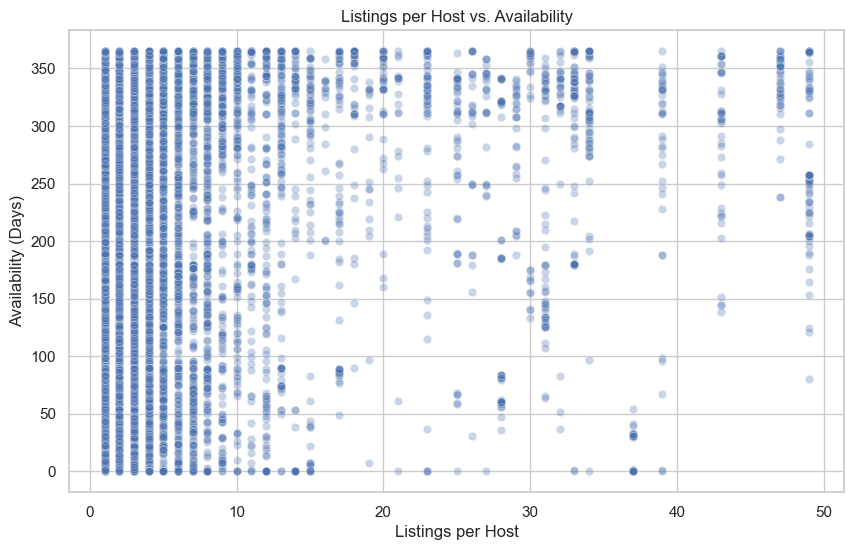

In [27]:
# 1. Distribution: Number of listings per host
plt.figure(figsize=(10, 6))
sns.histplot(df['calculated_host_listings_count'], bins=50, color='orange')
plt.xlim(0, 20)  # limit to keep chart readable
plt.title('Distribution of Listings per Host (Capped at 20)')
plt.xlabel('Number of Listings Owned by Host')
plt.ylabel('Number of Hosts')

plt.show()

# 2. Top 10 hosts by number of listings
top_hosts = df.groupby('host_id')['calculated_host_listings_count'].max().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_hosts.values, y=top_hosts.index, palette='coolwarm')
plt.title('Top 10 Hosts by Number of Listings')
plt.xlabel('Number of Listings')
plt.ylabel('Host ID')

plt.show()

# 3. Total reviews per host
reviews_per_host = df.groupby('host_id')['number_of_reviews'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=reviews_per_host.values, y=reviews_per_host.index, palette='mako')
plt.title('Top 10 Hosts by Total Reviews')
plt.xlabel('Total Reviews')
plt.ylabel('Host ID')

plt.show()

# 4. Relationship: Listings per host vs. availability
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df[df['calculated_host_listings_count'] < 50],
                x='calculated_host_listings_count',
                y='availability_365',
                alpha=0.3)
plt.title('Listings per Host vs. Availability')
plt.xlabel('Listings per Host')
plt.ylabel('Availability (Days)')

plt.show()

## objective 5 : to identify and visualise spatial patterns of airbnb density and pricing using geolocation data (latitude and longitude)

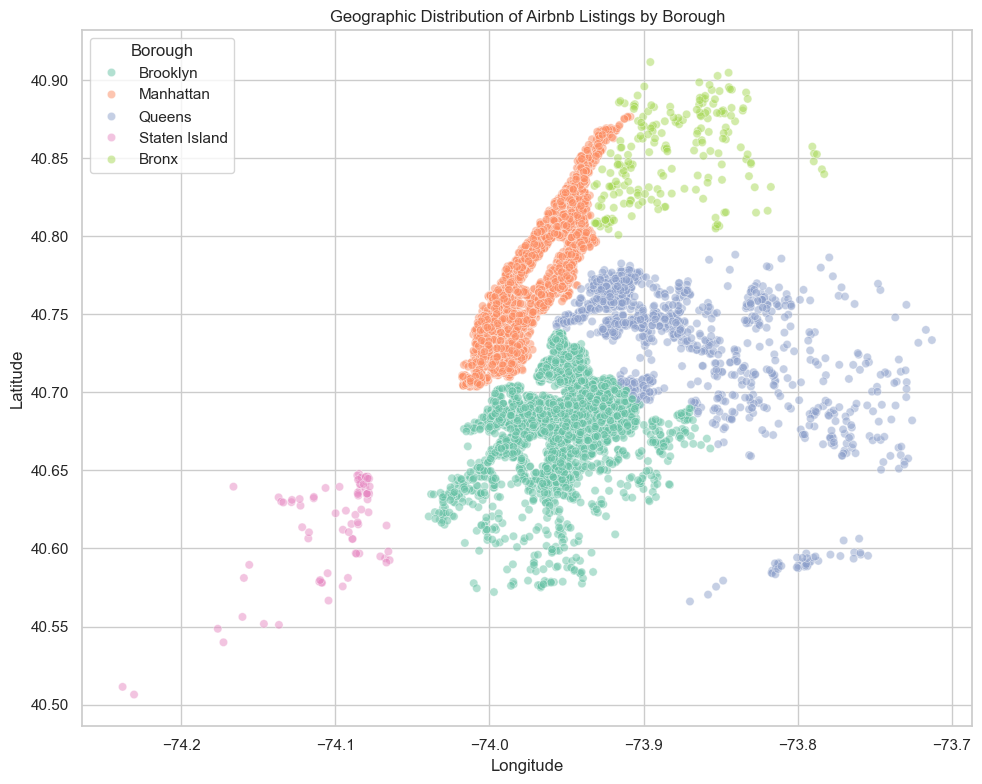

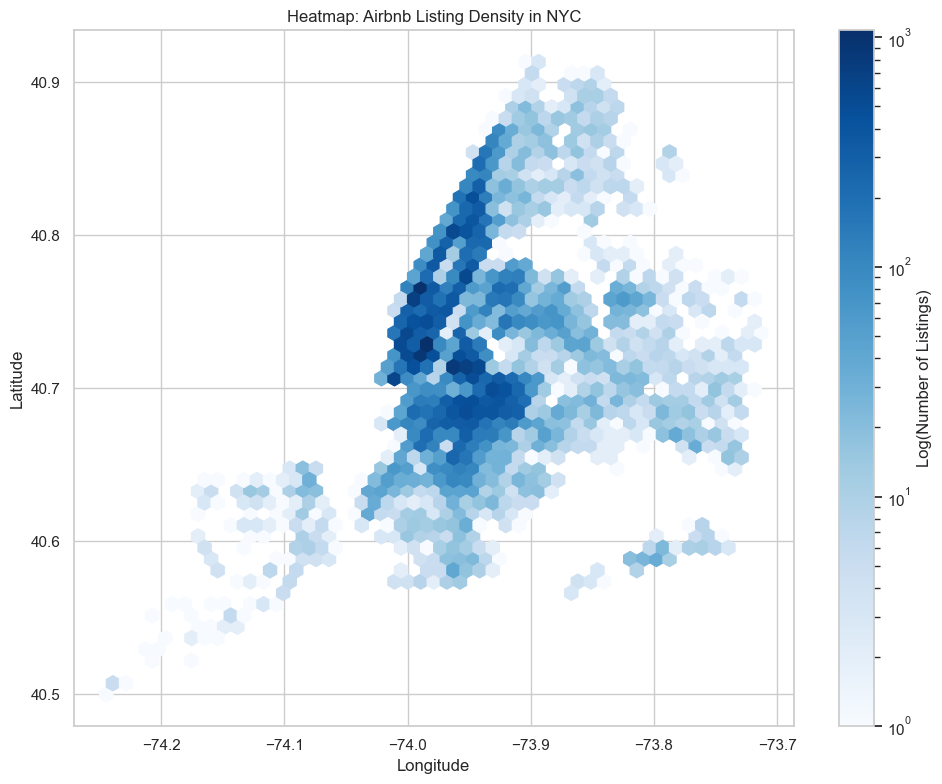

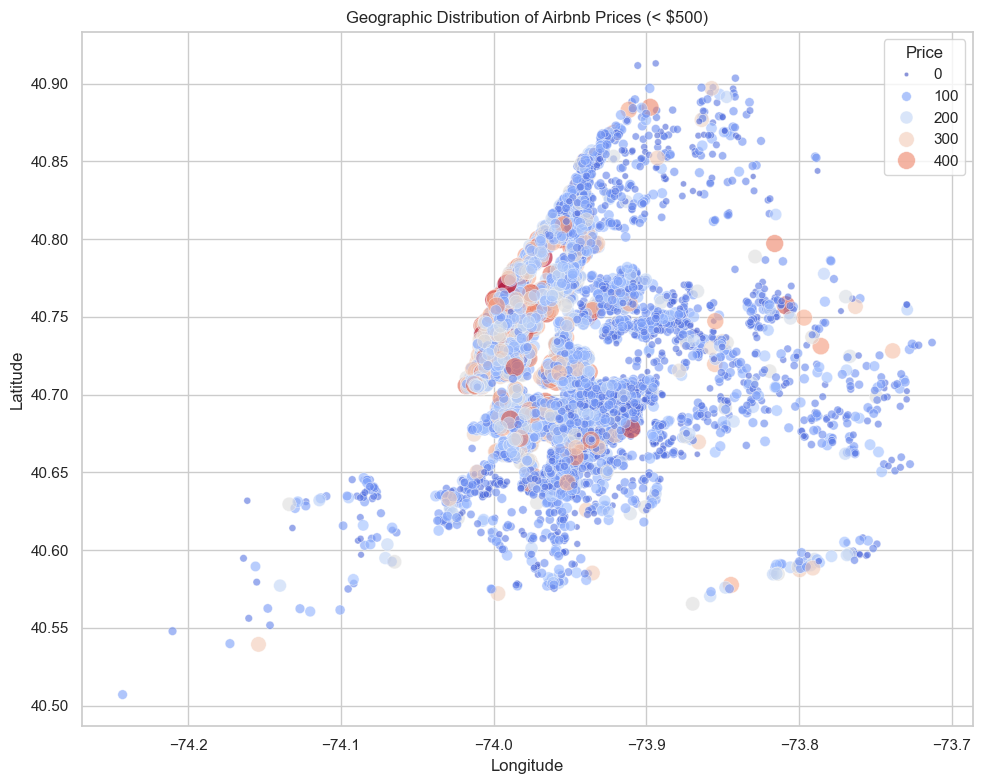

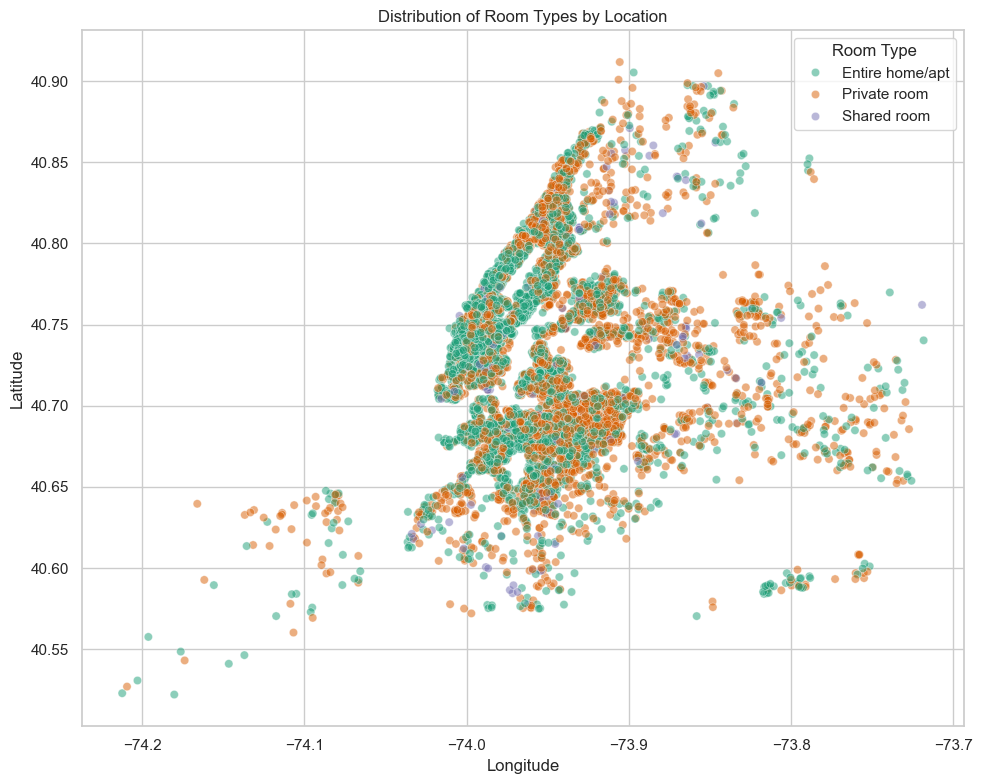

In [29]:
# 1. Basic scatter plot: all listings (colored by borough)
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df.sample(10000),  # sample to reduce overplotting
                x='longitude', y='latitude',
                hue='neighbourhood_group',
                alpha=0.5,
                palette='Set2')
plt.title('Geographic Distribution of Airbnb Listings by Borough')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='Borough')
plt.tight_layout()
plt.show()

# 2. Heatmap of listing density using hex bins)
plt.figure(figsize=(10, 8))
plt.hexbin(df['longitude'], df['latitude'], gridsize=50, cmap='Blues', bins='log')
plt.colorbar(label='Log(Number of Listings)')
plt.title('Heatmap: Airbnb Listing Density in NYC')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.tight_layout()
plt.show()

# 3. Scatter plot: prices across NYC (cap price to 500 to reduce noise)
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df[df['price'] < 500].sample(10000),
                x='longitude', y='latitude',
                hue='price', palette='coolwarm', alpha=0.6, size='price', sizes=(10, 200))
plt.title('Geographic Distribution of Airbnb Prices (< $500)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='Price')
plt.tight_layout()
plt.show()

# 4. Optional: Room type distribution across the map
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df.sample(10000), x='longitude', y='latitude',
                hue='room_type', alpha=0.5, palette='Dark2')
plt.title('Distribution of Room Types by Location')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='Room Type')
plt.tight_layout()
plt.show()

objective 6 : to explore customer engagement through review frequency and evaluate its relationship with pricing or availability

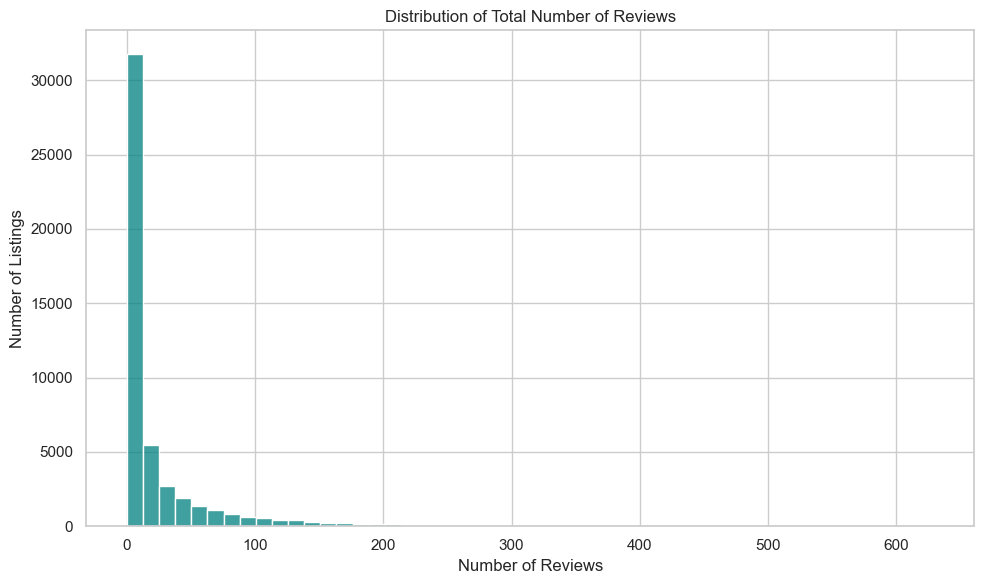

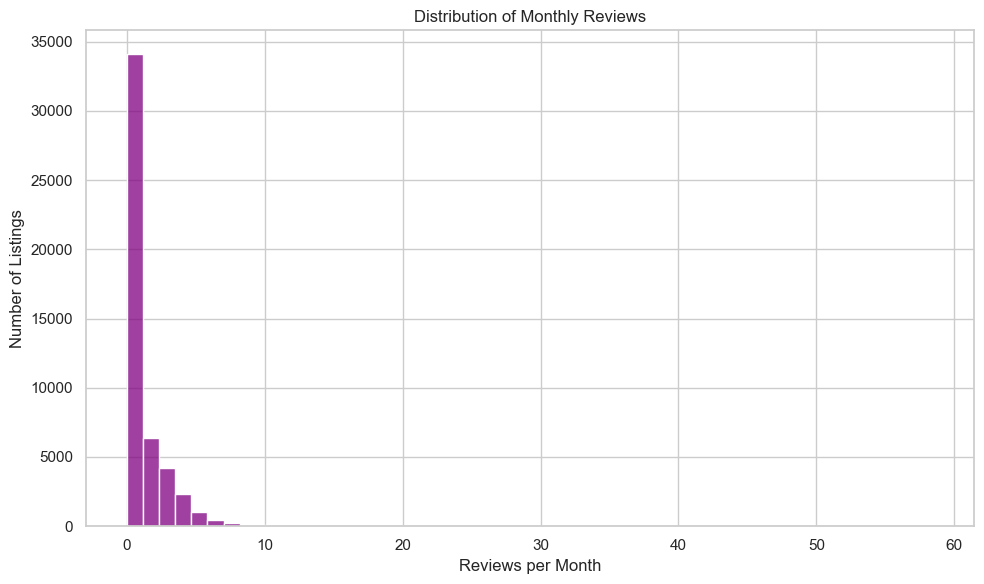

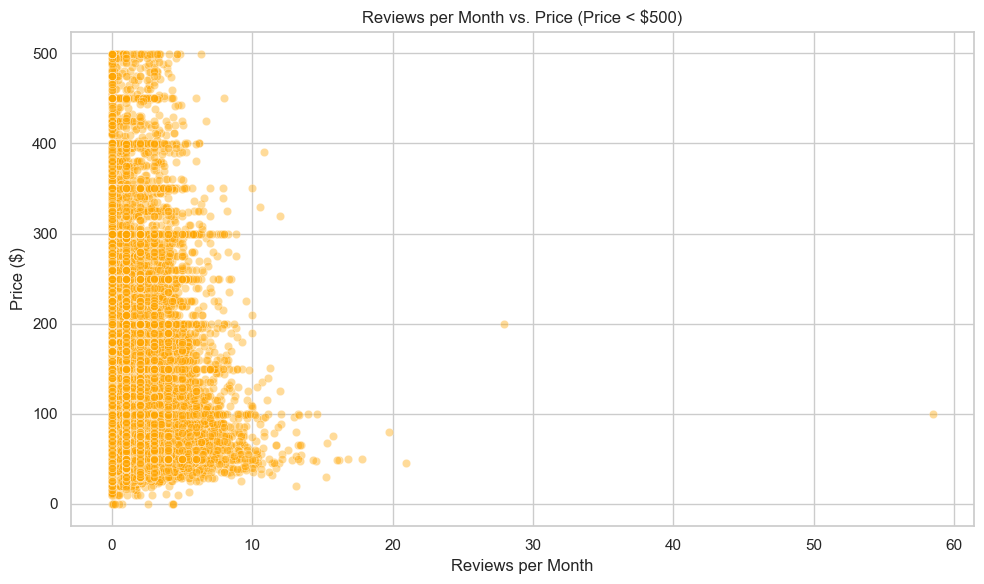

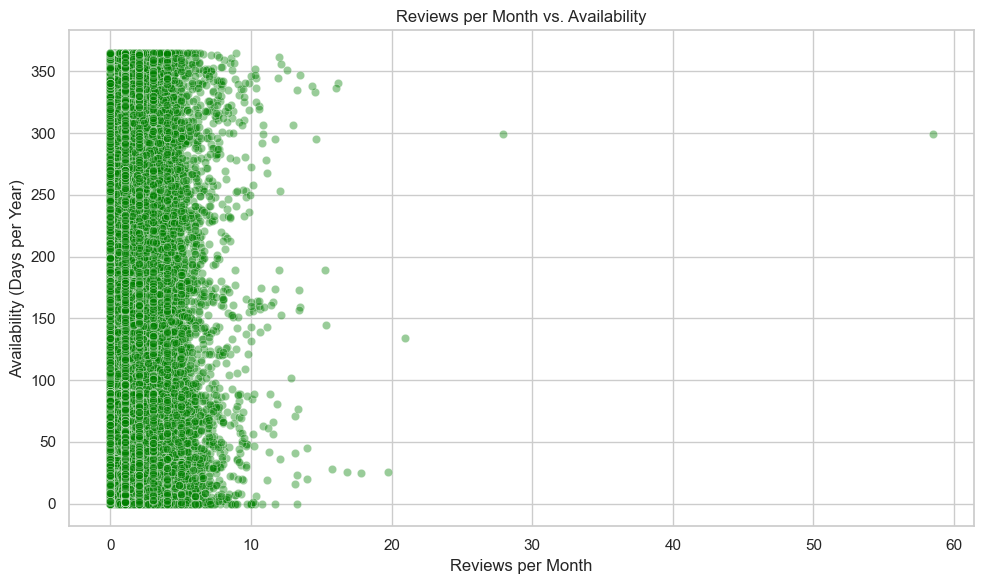


Correlation between reviews and other variables:
                      price  availability_365  reviews_per_month  \
price              1.000000          0.081841          -0.050576   
availability_365   0.081841          1.000000           0.163749   
reviews_per_month -0.050576          0.163749           1.000000   
number_of_reviews -0.047939          0.171859           0.589259   

                   number_of_reviews  
price                      -0.047939  
availability_365            0.171859  
reviews_per_month           0.589259  
number_of_reviews           1.000000  


In [30]:
# 1. Distribution of number of reviews
plt.figure(figsize=(10, 6))
sns.histplot(df['number_of_reviews'], bins=50, color='teal')
plt.title('Distribution of Total Number of Reviews')
plt.xlabel('Number of Reviews')
plt.ylabel('Number of Listings')
plt.tight_layout()
plt.show()

# 2. Distribution of reviews per month
plt.figure(figsize=(10, 6))
sns.histplot(df['reviews_per_month'], bins=50, color='purple')
plt.title('Distribution of Monthly Reviews')
plt.xlabel('Reviews per Month')
plt.ylabel('Number of Listings')
plt.tight_layout()
plt.show()

# 3. Relationship: reviews per month vs price
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df[df['price'] < 500],
                x='reviews_per_month',
                y='price',
                alpha=0.4,
                color='orange')
plt.title('Reviews per Month vs. Price (Price < $500)')
plt.xlabel('Reviews per Month')
plt.ylabel('Price ($)')
plt.tight_layout()
plt.show()

# 4. Relationship: reviews per month vs availability
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df,
                x='reviews_per_month',
                y='availability_365',
                alpha=0.4,
                color='green')
plt.title('Reviews per Month vs. Availability')
plt.xlabel('Reviews per Month')
plt.ylabel('Availability (Days per Year)')
plt.tight_layout()
plt.show()

# 5. Correlation check with reviews
review_corr = df[['price', 'availability_365', 'reviews_per_month', 'number_of_reviews']].corr()
print("\nCorrelation between reviews and other variables:")
print(review_corr)

MAJOR FINDINGS 
 Objective 1: Distribution of Listings Across Boroughs and Neighborhoods

The analysis showed that Airbnb listings are heavily concentrated in Manhattan and Brooklyn, which together account for the majority of all listings in New York City. Neighborhoods such as Williamsburg, Harlem, and Bedford-Stuyvesant appeared as top Airbnb hubs, while areas like Staten Island and The Bronx were underrepresented. This indicates a strong urban-tourism bias in listing distribution and reveals geographic gaps that may present opportunities for growth in lesser-saturated boroughs.

 Objective 2: Pricing Structure and Influencing Factors

Airbnb prices in NYC are highly variable, with most listings priced below $500 but a long tail of luxury or overpriced listings stretching far beyond. Entire home/apartment listings command the highest average rates, especially in Manhattan, while shared and private rooms are more budget-friendly. Interestingly, price had only weak correlations with numerical factors like availability and reviews, suggesting that location and room type are far stronger pricing determinants.

 Objective 3: Availability vs. Price, Room Type, and Neighborhood

The availability of listings (number of days per year) followed a bimodal distribution, with many listings either always available or rarely available. Private rooms showed higher average availability than entire homes, likely due to lower personal usage or regulatory restrictions. Scatter plots revealed no strong correlation between availability and price, indicating that hosts may keep listings open regardless of price point, perhaps to stay flexible or maximize occupancy.

 Objective 4: Host Activity Levels and Reviews

Most hosts in the dataset manage only one listing, but a small group of “power hosts” own dozens of properties, suggesting a semi-professional or commercial presence on the platform. Interestingly, those with the most listings weren’t necessarily the ones with the most guest reviews, implying that guest satisfaction and visibility aren’t solely driven by portfolio size. The analysis suggests that quality and engagement matter more than volume in maintaining host success.

 Objective 5: Spatial Patterns in Listing Density and Pricing

Geospatial visualizations showed that Airbnb listings are densely clustered in central locations like Lower Manhattan, Brooklyn Heights, and Harlem. Heatmaps and scatter plots highlighted how higher-priced listings are often found in downtown or tourist-frequented areas, while outer boroughs host more budget-friendly options. Room types are also spatially stratified, with shared rooms spread across a broader radius, and entire apartments clustered more centrally.

 Objective 6: Guest Engagement via Reviews and Their Relationships

Most Airbnb listings receive only a few reviews per month, and while some listings had hundreds of total reviews, many others had very few, showing unequal guest engagement across the platform. The analysis found no strong correlation between review frequency and price or availability, suggesting that engagement is influenced more by host behavior, communication, and stay quality than by pricing or availability alone. This underscores the importance of experience design over simply being active or affordable.

ACTIONABLE INSIGHTS 
 1. Location Strategy

With the majority of Airbnb listings concentrated in Manhattan and Brooklyn, these boroughs are highly competitive yet lucrative for established hosts. However, underserved areas like Queens and The Bronx show potential for expansion due to lower saturation. New hosts or investors could strategically target these outer boroughs, where fewer listings may mean less competition and an opportunity to capture untapped demand especially as tourism and urban renewal spread outward.

 2. Pricing Optimization

Since pricing is influenced more by room type and location than by reviews or availability, hosts can increase earnings by positioning their properties smartly such as offering entire apartments in central areas for premium rates. Conversely, in less central boroughs, offering affordable private rooms may attract budget-conscious travelers. Pricing strategies should reflect competitive benchmarking by room type within the same borough rather than arbitrary or cost-based pricing alone.

 3. Availability Management

Listings with consistently high availability (close to 365 days) tend to be private or shared rooms, likely because the host also lives on the property. Hosts aiming for high occupancy should consider offering private rooms with flexible scheduling, especially if full-time availability of an entire property is not feasible. Meanwhile, those managing multiple listings can stagger availability to avoid overlapping bookings and improve calendar optimization.

 4. Host Strategy and Growth

The dominance of individual hosts with one or two listings confirms Airbnb’s appeal to everyday users, but the presence of “power hosts” suggests an evolving commercial layer. New or growing hosts should focus on review quality, guest communication, and responsiveness to build credibility before scaling up. Rather than immediately expanding inventory, early-stage hosts should treat engagement and reputation as their most valuable growth assets.

 5. Geographic Expansion Opportunities

Spatial analysis reveals Airbnb listing “hotspots” in downtown and tourist-centric neighborhoods, but also noticeable gaps in listing density in peripheral yet accessible neighborhoods. These gaps represent key opportunities for geographic expansion. Hosts could capitalize on lower rental costs and increasing urban interest in places like Queens, East Bronx, or North Staten Island, while still maintaining access to city-wide attractions via transit.

 6. Experience Over Exposure

Guest review data indicates that neither high availability nor high price directly translates to more reviews or engagement. This means that guest experience including cleanliness, responsiveness, and accuracy of listing details likely plays the largest role in driving satisfaction and return bookings. Hosts should prioritize experience optimization, such as automating communication, maintaining top-tier amenities, and crafting clear, honest listings over simply lowering prices or boosting availability.
